In [1]:
# importing all modules needed for prediction
import pickle 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# machine learning libraries
import tensorflow as tf
import edward as ed

# bayesian neural network
from network_details import BayesianNeuralNetwork

In [2]:
# initializing an abstract network object
bnn = BayesianNeuralNetwork()

In [3]:
# get training set details
details = pickle.load(open('model/training_set_specs.pkl', 'rb'))
for att in ['mean_features', 'std_features', 'mean_targets', 'std_targets', 'max_targets', 'min_targets']:
    setattr(bnn.manager, att, details[att])

In [4]:
# constructing the network architecture 
bnn.construct_networks()

... constructing network


In [107]:
# loading the network parameters
sess  = ed.get_session()
saver = tf.train.Saver()
saver.restore(sess, 'model/bnn.ckpt')
#saver.restore(sess, 'model/tmp_bnn||.ckpt')

INFO:tensorflow:Restoring parameters from model/bnn.ckpt


In [108]:
# generate fake data
samples       = np.random.uniform(low = 0., high = 1., size = (100, 6))
close_samples = np.random.uniform(low = 0., high = 1., size = (200, 6))
for sample in close_samples:
    sample[2] = np.random.normal(0.25, 0.1)
values, _, _  = bnn.predict(samples, n_post = 100)
close_values, _, _  = bnn.predict(close_samples, n_post = 100)

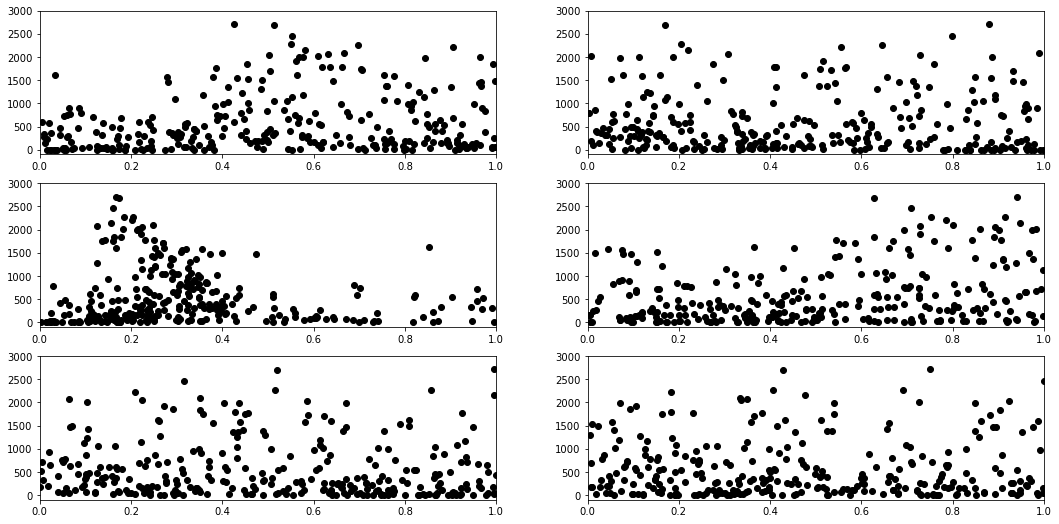

In [109]:
fig = plt.figure(figsize = (18, 9))
ax0 = plt.subplot2grid((3, 2), (0, 0))
ax1 = plt.subplot2grid((3, 2), (0, 1))
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax4 = plt.subplot2grid((3, 2), (2, 0))
ax5 = plt.subplot2grid((3, 2), (2, 1))
axs = [ax0, ax1, ax2, ax3, ax4, ax5]

for index in range(6):
    ax = axs[index]
    ax.set_xlim(0, 1)
    ax.set_ylim(-100, 3000)
    ax.plot(samples[:, index], values, marker = 'o', ls = '', color = 'k')
    ax.plot(close_samples[:, index], close_values, marker = 'o', ls = '', color = 'k')

plt.show()

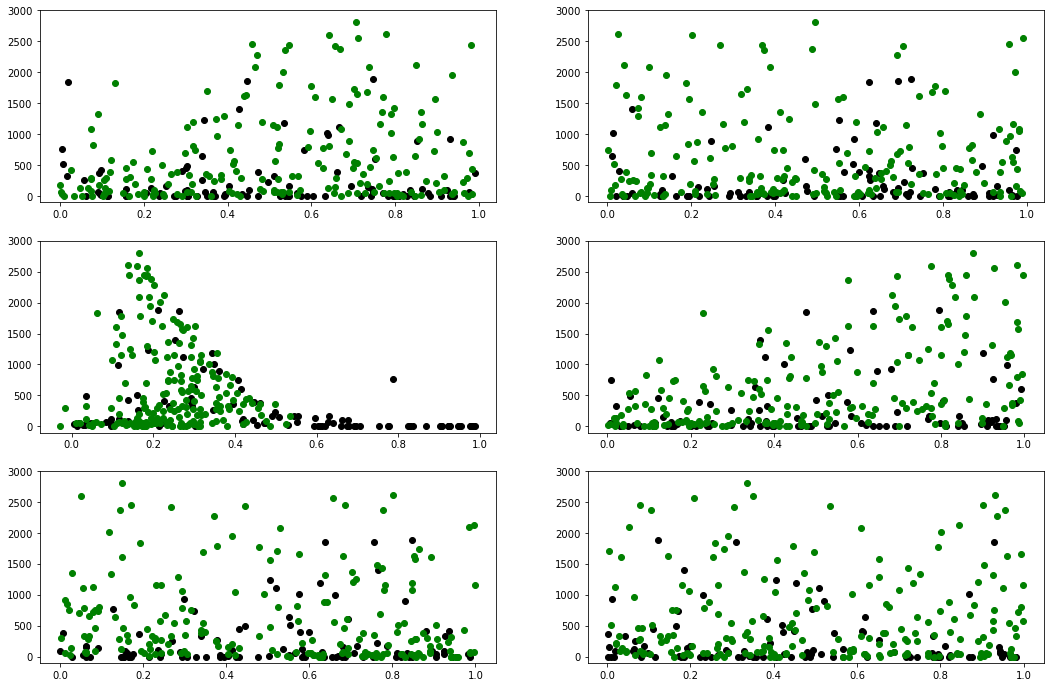

In [106]:
fig = plt.figure(figsize = (18, 12))
ax0 = plt.subplot2grid((3, 2), (0, 0))
ax1 = plt.subplot2grid((3, 2), (0, 1))
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax4 = plt.subplot2grid((3, 2), (2, 0))
ax5 = plt.subplot2grid((3, 2), (2, 1))
axs = [ax0, ax1, ax2, ax3, ax4, ax5]

for index in range(6):
    ax = axs[index]
    ax.set_ylim(-100, 3000)
    ax.plot(samples[:, index], values, marker = 'o', ls = '', color = 'k')
    ax.plot(close_samples[:, index], close_values, marker = 'o', ls = '', color = 'g')

plt.show()